In [ ]:
# Check if GPU is enabled
!nvidia-smi

Tue May 10 15:23:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install required phython packages
#-----------------------------------

#!python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1

#!pip install torch

In [ ]:
import torch
import os
from IPython.display import Image

In [ ]:
# Download yolov5 from Github

#!git clone https://github.com/ultralytics/yolov5

In [ ]:
%cd /content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5

[Errno 2] No such file or directory: '/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5'
/content


In [ ]:
#install yolov5 requirements

!pip install -r /content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/requirements.txt

     |████████████████████████████████| 596 kB 4.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Create .yaml file

### move the dataset’s .yaml file to the /content/yolov5/data directory.
### This file contains information required by YOLO to train the model on the custom data.

## Training

In [ ]:
#training YOLO on custom dataset
!python train.py --img 416 --batch 16 --epochs 200 --data /content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/data/dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-172-ge305aba torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_

## Detection

In [ ]:
!python detect.py --source /content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/data/test/dog_vid.mp4 --weights /content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/runs/train/exp4/weights/best.pt --data /content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/data/dataset.yaml --img 416 --save-txt

detect: weights=['/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/data/test/dog_vid.mp4, data=/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/data/dataset.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-172-ge305aba torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/283) /content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/data/test/dog_vid.mp4: 256x416 1 not_abandoned, Done. (0.021s)
video 1/1 (2/283) /content/drive/MyDrive/aba

In [ ]:
paths = []

d = "/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/runs/detect/exp2/labels"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
         paths.append(full_path)

predictions = []

for txt in paths:
  f = open(txt, 'r')
  data = f.read()
  predictions.append(int(data[0]))
  os.remove(txt)
  f.close
os.rmdir(d)
print(predictions)

not_abandoned = predictions.count(1)/len(predictions) * 100
abandoned = predictions.count(0)/len(predictions) * 100

if not_abandoned > 80.0:
  print('Dog is not abandoned')

elif abandoned > 80.0:
  print('WARNING!!! ABANDONED DOG!!!')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dog is not abandoned


In [ ]:

import cv2
from google.colab.patches import cv2_imshow

video_capture = cv2.VideoCapture('/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/runs/detect/exp2/dog_vid.mp4')

while True:
# Capture frame-by-frame
  ret, frame = video_capture.read()

  img=cv2_imshow(frame)

  if cv2.waitKey(1) & 0xFF == ord('q'):
      break



## Exploring the metrics recorded during training

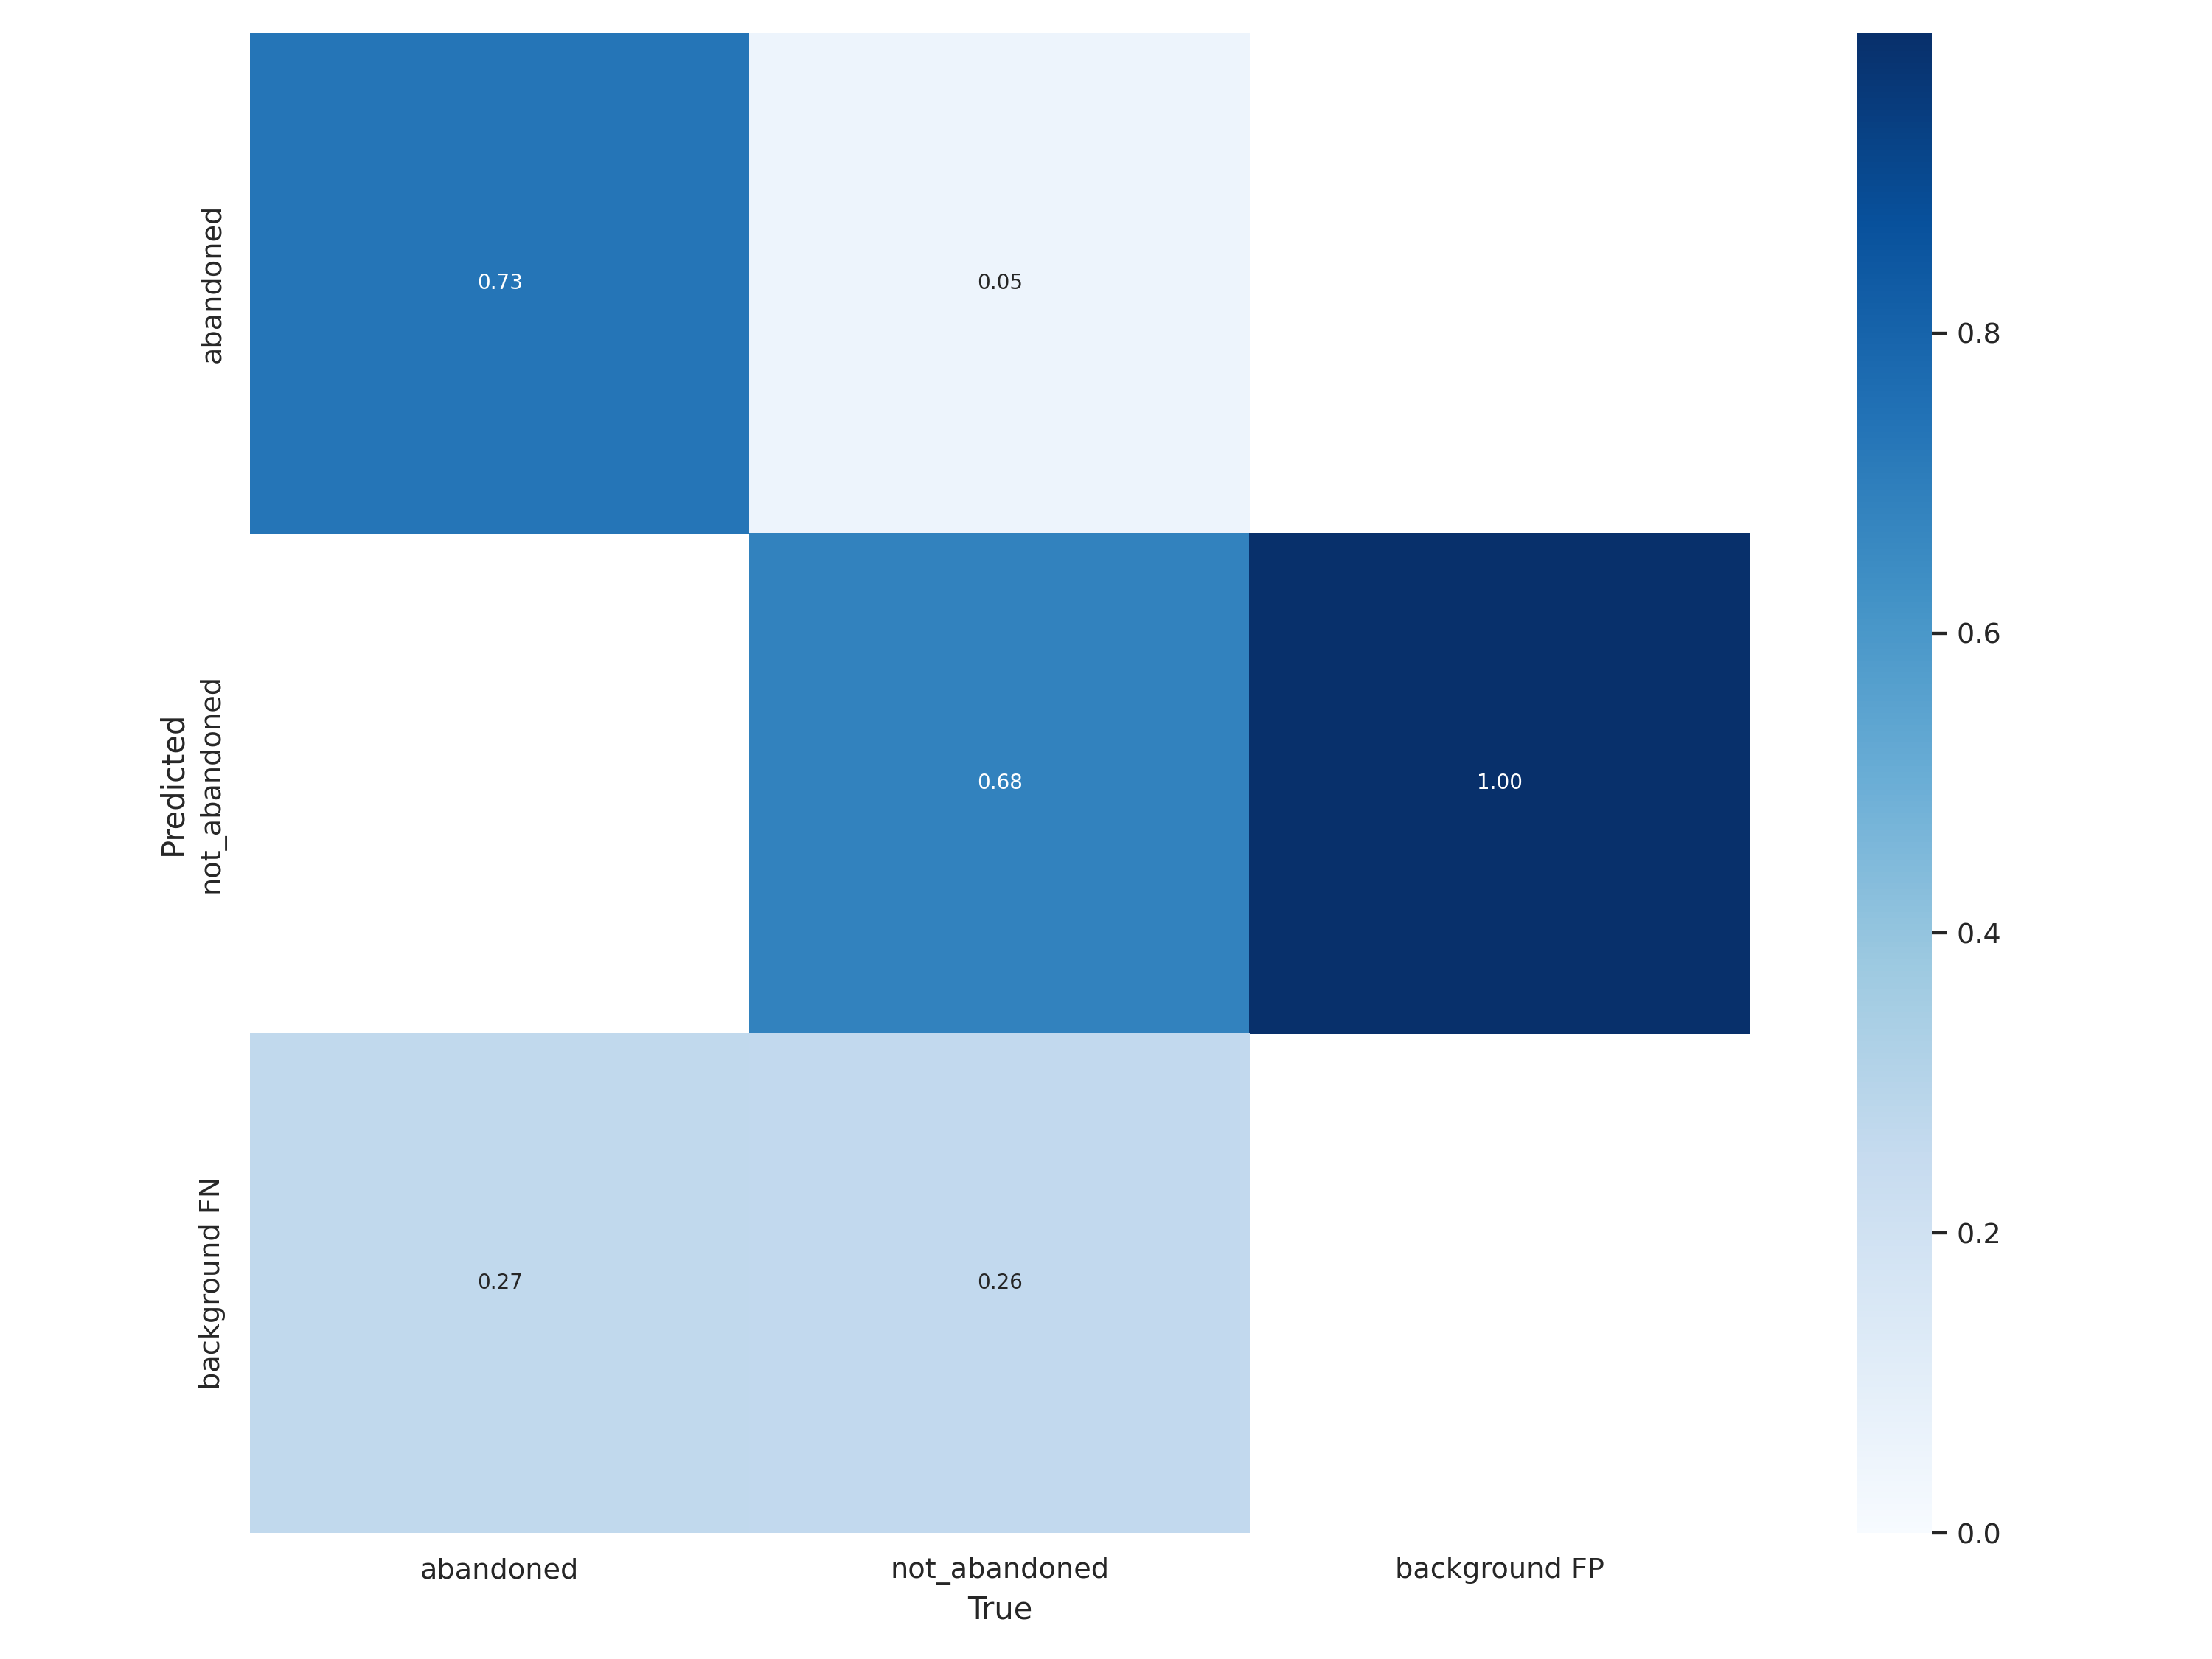

In [ ]:
Image(filename='/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/runs/train/exp4/confusion_matrix.png', width=1000)


## Exploring accuracy and model confidence.

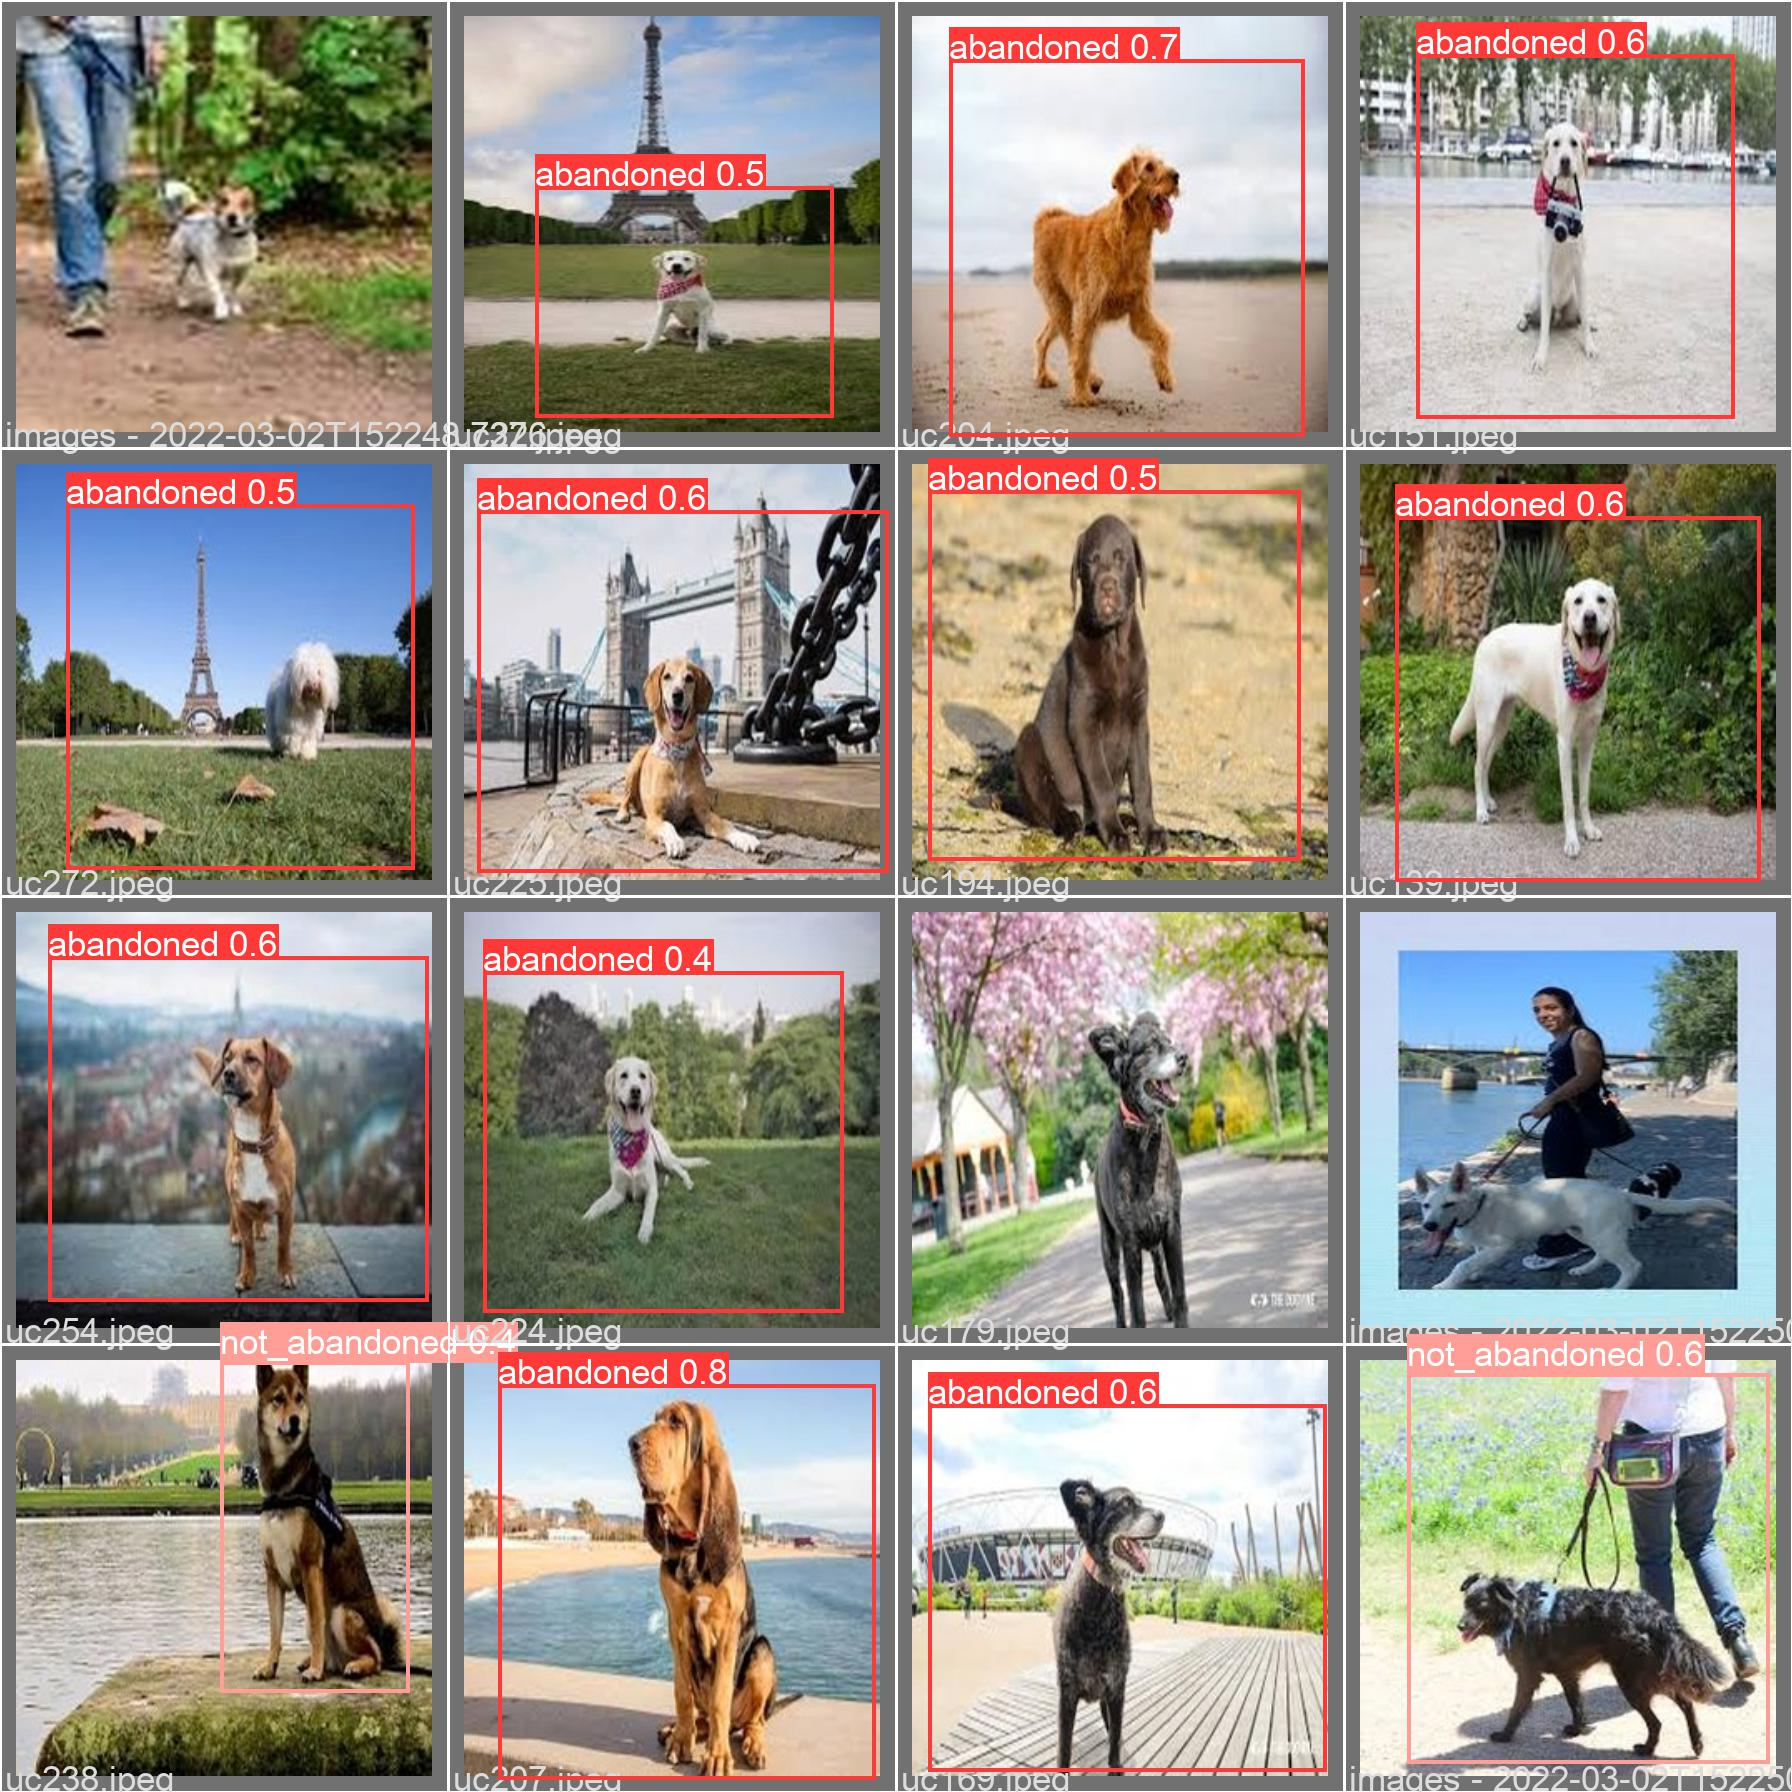

In [ ]:
Image(filename='/content/drive/MyDrive/abandoned_dog_yoloV5/abandoned_dog/yolov5/runs/train/exp4/val_batch0_pred.jpg', width=1000)


**Training on Yolov5 and V7**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 12.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

Yolov6

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov6n.yaml")  # load a pretrained model (recommended for training)

# Train the model

results = model.train(data="dataset.yaml", epochs=200, imgsz=640, weight_decay=0.0005, dropout=0.5, conf=0.45, iou=0.45, batch=10, verbose=True, name='exp', val=True, save=True, amp = True)

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov6n.yaml, data=dataset.yaml, epochs=200, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=exp5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=0.45, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/drive/MyDrive/PhD Deep Learning Models/abandoned_dog_yoloV5/abandoned_dog/data/dataset/labels/train.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/PhD Deep Learning Models/abandoned_dog_yoloV5/abandoned_dog/data/dataset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to runs/detect/exp5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 53 weight(decay=0.0), 62 weight(decay=0.00046875), 61 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/exp5
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.26G      3.108      3.961      4.284         20        640: 100%|██████████| 12/12 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.41it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.16G      3.026      3.943      4.259         26        640: 100%|██████████| 12/12 [00:01<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.62it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.14G       3.05      3.861      4.169         26        640: 100%|██████████| 12/12 [00:01<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.35it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.16G      2.993       3.95      4.112         29        640: 100%|██████████| 12/12 [00:01<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.22it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.14G      3.042      3.864      4.013         25        640: 100%|██████████| 12/12 [00:01<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.35it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.16G      2.908      3.732      3.937         24        640: 100%|██████████| 12/12 [00:01<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.18it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.14G      2.887       3.77      3.866         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.65it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.16G      2.867      3.764      3.764         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.78it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.16G      2.854      3.796      3.745         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.12it/s]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.16G      2.813      3.793      3.669         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.83it/s]

                   all         30         34      0.501     0.0667   0.000618   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.16G      2.765      3.715      3.582         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.96it/s]

                   all         30         34      0.501     0.0667   0.000618   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.16G       2.81      3.739      3.534         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.88it/s]

                   all         30         34      0.501     0.0667   0.000618   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.14G      2.809      3.698      3.485         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.19it/s]

                   all         30         34      0.501     0.0667   0.000618   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.16G      2.769      3.758      3.507         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.77it/s]

                   all         30         34      0.501     0.0667   0.000618   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.14G      2.656      3.635      3.413         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.08it/s]

                   all         30         34      0.501     0.0667   0.000618   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.16G      2.745      3.682      3.392         22        640: 100%|██████████| 12/12 [00:01<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.78it/s]

                   all         30         34     0.0366     0.0789      0.022    0.00575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.14G      2.753      3.698       3.41         24        640: 100%|██████████| 12/12 [00:01<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all         30         34      0.535      0.289     0.0341    0.00992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.16G      2.694      3.633      3.324         30        640: 100%|██████████| 12/12 [00:01<00:00, 11.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.17it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.14G      2.616       3.62      3.266         23        640: 100%|██████████| 12/12 [00:01<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.48it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.16G      2.584      3.545      3.231         19        640: 100%|██████████| 12/12 [00:01<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.30it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.16G       2.54      3.542      3.168         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.44it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.16G      2.528       3.46      3.142         32        640: 100%|██████████| 12/12 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.21it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.16G      2.467      3.512      3.072         19        640: 100%|██████████| 12/12 [00:00<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.65it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.16G      2.467      3.465      3.049         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.18it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.16G      2.527      3.532      3.059         17        640: 100%|██████████| 12/12 [00:00<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.82it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.16G      2.458      3.407      3.008         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.28it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.16G      2.441      3.496      3.022         17        640: 100%|██████████| 12/12 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 22.26it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.16G      2.412      3.407      2.994         16        640: 100%|██████████| 12/12 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.60it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.16G      2.425      3.472      3.001         19        640: 100%|██████████| 12/12 [00:01<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.88it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.16G      2.381      3.404      2.896         27        640: 100%|██████████| 12/12 [00:01<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.26it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.16G      2.411      3.332      2.923         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.94it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.16G      2.315      3.312      2.862         30        640: 100%|██████████| 12/12 [00:01<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.20it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.16G      2.372       3.33      2.894         23        640: 100%|██████████| 12/12 [00:01<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.76it/s]

                   all         30         34     0.0833     0.0526     0.0478      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.16G       2.31      3.314      2.866         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.13it/s]

                   all         30         34      0.257     0.0526      0.134       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.16G      2.321      3.246      2.789         27        640: 100%|██████████| 12/12 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.29it/s]

                   all         30         34     0.0541      0.105      0.036     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.16G       2.19      3.235      2.777         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.58it/s]

                   all         30         34    0.00385     0.0263    0.00204   0.000204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.16G      2.301      3.263      2.779         25        640: 100%|██████████| 12/12 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]

                   all         30         34     0.0426      0.184     0.0285    0.00587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.16G      2.313      3.262      2.787         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.18it/s]


                   all         30         34     0.0426      0.184     0.0285    0.00587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.16G      2.286      3.208      2.738         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.33it/s]

                   all         30         34     0.0426      0.184     0.0285    0.00587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.16G      2.303      3.152       2.76         18        640: 100%|██████████| 12/12 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 22.48it/s]

                   all         30         34     0.0426      0.184     0.0285    0.00587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.16G      2.299      3.245      2.772         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.52it/s]

                   all         30         34     0.0426      0.184     0.0285    0.00587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.16G      2.263      3.165      2.737         25        640: 100%|██████████| 12/12 [00:01<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.93it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.16G      2.161      3.208      2.738         23        640: 100%|██████████| 12/12 [00:00<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.14it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.16G      2.203      3.148       2.72         33        640: 100%|██████████| 12/12 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.45it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.16G      2.241      3.142      2.703         19        640: 100%|██████████| 12/12 [00:01<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.77it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.16G      2.146      3.093      2.687         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.63it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.16G      2.199      3.198      2.731         23        640: 100%|██████████| 12/12 [00:01<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.66it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.16G      2.278      3.109      2.749         29        640: 100%|██████████| 12/12 [00:00<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.06it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      1.16G      2.215      3.116      2.701         18        640: 100%|██████████| 12/12 [00:00<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.92it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.16G      2.198      3.074      2.648         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.21it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.16G       2.21      3.083      2.654         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.10it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.16G      2.251      3.041      2.706         24        640: 100%|██████████| 12/12 [00:00<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.05it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.16G       2.19      3.037      2.637         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.72it/s]

                   all         30         34     0.0238     0.0263     0.0129    0.00129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.16G        2.2      3.136      2.708         32        640: 100%|██████████| 12/12 [00:00<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.92it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.16G      2.139      3.058      2.629         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.50it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.16G      2.169      2.996       2.65         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.85it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.16G      2.203      3.071      2.631         26        640: 100%|██████████| 12/12 [00:01<00:00, 11.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.38it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.16G      2.177      3.025      2.652         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.37it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.16G      2.158      2.997      2.604         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.41it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.16G      2.164       2.98      2.618         23        640: 100%|██████████| 12/12 [00:00<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.35it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.16G      2.138      3.012      2.581         22        640: 100%|██████████| 12/12 [00:00<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.51it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.16G      2.075      2.942       2.55         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.93it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.16G      2.086      2.946      2.553         22        640: 100%|██████████| 12/12 [00:00<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.81it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.16G      2.119      2.996      2.644         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.41it/s]

                   all         30         34     0.0143     0.0263    0.00759    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.16G      2.166      3.089      2.626         23        640: 100%|██████████| 12/12 [00:00<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.08it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.16G      2.093      2.954      2.596         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.92it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.16G      2.116      3.015      2.642         22        640: 100%|██████████| 12/12 [00:01<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.81it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.16G      2.109      2.978      2.546         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.36it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.16G       1.94      2.863      2.485         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.86it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.16G      2.137      2.986      2.588         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.45it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.16G      2.077      3.013      2.602         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.53it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      1.16G      2.146      2.962      2.573         18        640: 100%|██████████| 12/12 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.53it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.16G      2.111      2.883      2.513         30        640: 100%|██████████| 12/12 [00:01<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.06it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.16G      2.071      3.033      2.598         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.22it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.16G      2.118      2.889       2.56         29        640: 100%|██████████| 12/12 [00:00<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.53it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.16G      2.086      2.924      2.537         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.65it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.16G       2.01      2.894      2.552         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.50it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.16G      2.028      2.918      2.558         31        640: 100%|██████████| 12/12 [00:00<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.93it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.16G      2.104      2.865       2.52         18        640: 100%|██████████| 12/12 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.65it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.16G      2.014      2.785      2.478         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.17it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.16G      2.065      2.849       2.51         18        640: 100%|██████████| 12/12 [00:01<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.44it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.16G      2.009      2.782      2.475         24        640: 100%|██████████| 12/12 [00:01<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.11it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.16G      2.059      2.763      2.564         27        640: 100%|██████████| 12/12 [00:01<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.13it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.16G      2.026      2.772      2.526         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.04it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.16G       1.99      2.736      2.466         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.45it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.16G      2.077      2.848      2.524         21        640: 100%|██████████| 12/12 [00:01<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.26it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.16G      2.053      2.839      2.469         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.26it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.16G      2.034       2.82      2.481         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.72it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.16G       2.04       2.85      2.519         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.85it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.16G      2.004      2.733      2.494         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.01it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.16G      2.028      2.715      2.555         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.77it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.16G      2.024       2.81      2.531         23        640: 100%|██████████| 12/12 [00:00<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.43it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.16G       1.97      2.658      2.458         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.06it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.16G      2.036      2.703      2.516         27        640: 100%|██████████| 12/12 [00:01<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.51it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.16G      1.961       2.73      2.478         19        640: 100%|██████████| 12/12 [00:01<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.71it/s]

                   all         30         34      0.137     0.0263     0.0681     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.16G      1.982      2.746      2.486         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.81it/s]

                   all         30         34      0.173     0.0789      0.105     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.16G      1.997      2.759      2.496         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.27it/s]

                   all         30         34      0.298      0.105      0.146     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.16G      1.921      2.697      2.473         24        640: 100%|██████████| 12/12 [00:01<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.37it/s]

                   all         30         34      0.286      0.105      0.209     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.16G      2.058      2.734      2.493         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.04it/s]


                   all         30         34        0.5     0.0526      0.276     0.0553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.16G      2.016      2.739      2.498         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.28it/s]

                   all         30         34        0.5     0.0526      0.276     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.16G      1.961      2.668      2.428         31        640: 100%|██████████| 12/12 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.39it/s]

                   all         30         34        0.5     0.0526      0.276     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.16G      1.972      2.657      2.448         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.07it/s]

                   all         30         34        0.5     0.0526      0.276     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.16G      1.974      2.556      2.467         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.15it/s]

                   all         30         34        0.5     0.0526      0.276     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.16G      1.972      2.702      2.449         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.11it/s]

                   all         30         34        0.5     0.0526      0.276     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.16G      1.999      2.617      2.437         19        640: 100%|██████████| 12/12 [00:00<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.39it/s]

                   all         30         34        0.5     0.0526      0.276     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.16G      2.001      2.569      2.416         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.31it/s]

                   all         30         34        0.5     0.0526      0.276     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.16G      1.981      2.671      2.458         30        640: 100%|██████████| 12/12 [00:01<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.47it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.16G      1.934      2.652      2.423         28        640: 100%|██████████| 12/12 [00:01<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.01it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.16G      1.986      2.611      2.377         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.87it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.16G      1.946      2.617      2.408         28        640: 100%|██████████| 12/12 [00:01<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.66it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.16G      2.012      2.601      2.428         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.29it/s]


                   all         30         34          1     0.0596       0.53      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.16G      1.929      2.603      2.387         32        640: 100%|██████████| 12/12 [00:00<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.71it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.16G      1.953      2.594      2.397         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.32it/s]


                   all         30         34          1     0.0596       0.53      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.16G      1.964       2.59      2.424         19        640: 100%|██████████| 12/12 [00:00<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.86it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.16G      1.918      2.562      2.386         29        640: 100%|██████████| 12/12 [00:00<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.68it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.16G      1.897      2.576       2.38         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.84it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.16G      1.971      2.575      2.424         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.52it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.16G      1.861      2.415      2.371         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.51it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.16G      1.914      2.521      2.373         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.04it/s]

                   all         30         34          1     0.0596       0.53      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.16G      1.884      2.563      2.367         24        640: 100%|██████████| 12/12 [00:01<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.44it/s]

                   all         30         34       0.25     0.0263      0.132     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.16G      1.909      2.524      2.399         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.46it/s]

                   all         30         34      0.182      0.105      0.123     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.16G      1.926      2.554      2.389         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.40it/s]

                   all         30         34       0.25      0.132      0.177     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.16G      1.959      2.528      2.408         31        640: 100%|██████████| 12/12 [00:01<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.11it/s]

                   all         30         34      0.408     0.0263      0.106     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.16G      1.926      2.525      2.397         33        640: 100%|██████████| 12/12 [00:01<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.29it/s]

                   all         30         34      0.408     0.0263      0.106     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.16G      1.894      2.511      2.375         29        640: 100%|██████████| 12/12 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.87it/s]

                   all         30         34        0.5     0.0333      0.267     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      1.16G       1.94      2.541      2.435         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.89it/s]


                   all         30         34        0.5     0.0333      0.267     0.0267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      1.16G      1.929      2.515      2.369         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.91it/s]

                   all         30         34        0.5     0.0333      0.267     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.16G      1.889      2.472      2.327         23        640: 100%|██████████| 12/12 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.13it/s]

                   all         30         34        0.5     0.0333      0.267     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      1.16G      1.911       2.49      2.344         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.18it/s]

                   all         30         34        0.5     0.0333      0.267     0.0533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.16G      1.884      2.419      2.314         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.05it/s]

                   all         30         34      0.667     0.0596      0.359      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.16G      1.872      2.503      2.302         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.96it/s]

                   all         30         34      0.168     0.0263     0.0727     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.16G      1.868      2.411      2.301         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.58it/s]

                   all         30         34       0.25     0.0789      0.158     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.16G      1.883      2.481      2.345         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.44it/s]

                   all         30         34      0.368     0.0263     0.0746    0.00746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.16G      1.885      2.465      2.331         27        640: 100%|██████████| 12/12 [00:01<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.96it/s]

                   all         30         34      0.423     0.0263      0.145     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.16G      1.884      2.461      2.363         25        640: 100%|██████████| 12/12 [00:01<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.32it/s]

                   all         30         34      0.423     0.0263      0.145     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      1.16G      1.888      2.483      2.365         21        640: 100%|██████████| 12/12 [00:01<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.38it/s]

                   all         30         34        0.5     0.0333      0.267      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.16G      1.827      2.299      2.264         29        640: 100%|██████████| 12/12 [00:00<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.62it/s]

                   all         30         34      0.625     0.0596      0.335      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.16G      1.739      2.336      2.282         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.95it/s]

                   all         30         34      0.916      0.086      0.468      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.16G      1.859      2.457      2.269         23        640: 100%|██████████| 12/12 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.51it/s]

                   all         30         34          1      0.086      0.543      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.16G      1.783       2.41      2.272         18        640: 100%|██████████| 12/12 [00:00<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.59it/s]

                   all         30         34          1      0.086      0.543      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.16G      1.805      2.429      2.297         34        640: 100%|██████████| 12/12 [00:00<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.08it/s]

                   all         30         34        0.5     0.0333      0.267      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.16G      1.848      2.303      2.305         29        640: 100%|██████████| 12/12 [00:00<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.25it/s]

                   all         30         34        0.5     0.0333      0.267      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.16G       1.91      2.441      2.366         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.45it/s]

                   all         30         34        0.5     0.0333      0.267      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      1.16G      1.817      2.366      2.308         31        640: 100%|██████████| 12/12 [00:00<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.25it/s]

                   all         30         34        0.5     0.0333      0.267      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.16G      1.884      2.388      2.338         26        640: 100%|██████████| 12/12 [00:01<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.85it/s]

                   all         30         34       0.25     0.0526      0.138     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.16G       1.82      2.421      2.327         28        640: 100%|██████████| 12/12 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.41it/s]

                   all         30         34      0.222     0.0526      0.071     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.16G      1.843      2.323       2.28         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.25it/s]

                   all         30         34      0.225     0.0526     0.0822     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.16G      1.854      2.376      2.299         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.61it/s]

                   all         30         34        0.2     0.0526      0.116      0.042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.16G       1.86      2.334        2.3         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 21.27it/s]

                   all         30         34       0.17     0.0263     0.0923     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.16G      1.775      2.248       2.26         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.74it/s]

                   all         30         34      0.667     0.0596      0.373      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.16G      1.767       2.35      2.254         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.95it/s]

                   all         30         34          1      0.086      0.543      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.16G      1.764      2.388      2.293         21        640: 100%|██████████| 12/12 [00:00<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.99it/s]

                   all         30         34          1      0.086      0.543       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.16G       1.82      2.369      2.285         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.06it/s]

                   all         30         34          1      0.086      0.543       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.16G      1.834      2.355      2.265         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.38it/s]

                   all         30         34       0.75     0.0596      0.398      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.16G       1.76      2.389      2.264         19        640: 100%|██████████| 12/12 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.77it/s]

                   all         30         34        0.5     0.0667      0.283     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.16G      1.775      2.299      2.224         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.09it/s]

                   all         30         34        0.5     0.0667      0.283     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      1.16G      1.777      2.348      2.283         23        640: 100%|██████████| 12/12 [00:00<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.57it/s]

                   all         30         34        0.5     0.0667      0.283      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.16G      1.843      2.411       2.31         26        640: 100%|██████████| 12/12 [00:00<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.37it/s]

                   all         30         34       0.25     0.0667      0.164     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.16G      1.791      2.303       2.31         28        640: 100%|██████████| 12/12 [00:01<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.74it/s]

                   all         30         34      0.267     0.0596      0.167     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      1.16G      1.867      2.364      2.318         25        640: 100%|██████████| 12/12 [00:01<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.48it/s]

                   all         30         34      0.438      0.112      0.268      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.16G      1.796      2.316      2.323         19        640: 100%|██████████| 12/12 [00:01<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.51it/s]

                   all         30         34      0.688      0.112      0.377      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.16G      1.758       2.31      2.237         23        640: 100%|██████████| 12/12 [00:01<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.65it/s]

                   all         30         34      0.667      0.086      0.362      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      1.16G      1.792      2.307       2.27         32        640: 100%|██████████| 12/12 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.94it/s]

                   all         30         34      0.667     0.0596      0.359      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.16G      1.806      2.281      2.271         21        640: 100%|██████████| 12/12 [00:01<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.99it/s]

                   all         30         34       0.75      0.086      0.405       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.16G      1.834       2.32      2.307         23        640: 100%|██████████| 12/12 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.82it/s]

                   all         30         34       0.25     0.0526      0.156     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.16G      1.759      2.279      2.238         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.49it/s]

                   all         30         34      0.266     0.0526      0.164       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.16G      1.742      2.227       2.23         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.21it/s]

                   all         30         34      0.167     0.0526     0.0984     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.16G      1.801      2.362       2.26         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.13it/s]

                   all         30         34      0.286      0.105      0.186     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.16G      1.807      2.327      2.276         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.85it/s]

                   all         30         34       0.25     0.0789      0.163     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      1.16G      1.813      2.288      2.281         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.43it/s]

                   all         30         34      0.286      0.105      0.178     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.16G      1.799      2.297      2.215         19        640: 100%|██████████| 12/12 [00:00<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.40it/s]

                   all         30         34      0.286      0.105      0.173     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.16G      1.749      2.326      2.239         20        640: 100%|██████████| 12/12 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.16it/s]

                   all         30         34       0.25     0.0789      0.145      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      1.16G       1.73      2.322       2.26         22        640: 100%|██████████| 12/12 [00:01<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.03it/s]

                   all         30         34        0.2     0.0526      0.111     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.16G      1.739      2.277      2.202         22        640: 100%|██████████| 12/12 [00:00<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.42it/s]

                   all         30         34       0.25     0.0789      0.145     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.16G      1.793      2.311      2.273         20        640: 100%|██████████| 12/12 [00:01<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.76it/s]

                   all         30         34      0.833      0.139      0.475      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.16G      1.768      2.303      2.258         25        640: 100%|██████████| 12/12 [00:01<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.21it/s]

                   all         30         34      0.917      0.165       0.53      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.16G      1.776      2.262      2.249         26        640: 100%|██████████| 12/12 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.05it/s]

                   all         30         34      0.917      0.165      0.534      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.16G      1.849      2.254      2.295         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.29it/s]

                   all         30         34      0.833      0.191      0.513      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.16G      1.806      2.224       2.24         27        640: 100%|██████████| 12/12 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.82it/s]

                   all         30         34        0.8      0.191        0.5      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.16G      1.731      2.183      2.227         30        640: 100%|██████████| 12/12 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.91it/s]

                   all         30         34       0.75      0.165      0.458       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.16G      1.741      2.124      2.185         33        640: 100%|██████████| 12/12 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.19it/s]

                   all         30         34      0.778      0.165      0.463      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.16G      1.731      2.229      2.224         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.90it/s]

                   all         30         34       0.75      0.139      0.432       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.16G      1.709      2.187      2.189         25        640: 100%|██████████| 12/12 [00:00<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.84it/s]

                   all         30         34       0.75      0.139      0.432       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.16G      1.784      2.336      2.273         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.30it/s]

                   all         30         34      0.714      0.112      0.396      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.16G      1.815      2.336      2.273         18        640: 100%|██████████| 12/12 [00:01<00:00, 11.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.59it/s]

                   all         30         34       0.75      0.086      0.405      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      1.16G      1.801      2.194      2.237         27        640: 100%|██████████| 12/12 [00:01<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.67it/s]

                   all         30         34        0.5     0.0333      0.267      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.16G      1.729      2.172      2.243         34        640: 100%|██████████| 12/12 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.50it/s]

                   all         30         34        0.5     0.0333      0.267      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.16G      1.739       2.25      2.229         17        640: 100%|██████████| 12/12 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.03it/s]


                   all         30         34        0.5     0.0333      0.267      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      1.16G      1.676      2.174      2.211         18        640: 100%|██████████| 12/12 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.76it/s]

                   all         30         34      0.667     0.0596      0.359      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.16G      1.787      2.327      2.273         24        640: 100%|██████████| 12/12 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.01it/s]

                   all         30         34      0.873      0.086      0.468      0.145


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      1.16G      1.688      2.256      2.445         11        640: 100%|██████████| 12/12 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.23it/s]

                   all         30         34      0.921      0.086      0.468      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      1.16G      1.639      2.191      2.314         10        640: 100%|██████████| 12/12 [00:00<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.30it/s]

                   all         30         34      0.833      0.119      0.485      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.16G      1.668       2.29      2.432         11        640: 100%|██████████| 12/12 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.43it/s]

                   all         30         34      0.625      0.093      0.356      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      1.16G      1.668      2.189      2.448         11        640: 100%|██████████| 12/12 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.18it/s]

                   all         30         34        0.6      0.093      0.344      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.16G      1.653      2.122      2.361         11        640: 100%|██████████| 12/12 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.06it/s]

                   all         30         34      0.368     0.0596       0.21     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      1.16G       1.63      2.119      2.387         10        640: 100%|██████████| 12/12 [00:00<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.99it/s]

                   all         30         34      0.417      0.086      0.246      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.16G      1.719      2.113      2.437         10        640: 100%|██████████| 12/12 [00:01<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.81it/s]

                   all         30         34      0.417      0.086      0.248      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.16G      1.623      2.106      2.369         11        640: 100%|██████████| 12/12 [00:00<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.99it/s]

                   all         30         34       0.45      0.086       0.26      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.16G      1.604      2.109      2.359         11        640: 100%|██████████| 12/12 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.41it/s]

                   all         30         34       0.45      0.086       0.26      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.16G      1.599      2.095      2.327         11        640: 100%|██████████| 12/12 [00:00<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.51it/s]

                   all         30         34        0.5      0.112      0.315      0.119



200 epochs completed in 0.124 hours.
Optimizer stripped from runs/detect/exp5/weights/last.pt, 8.7MB
Optimizer stripped from runs/detect/exp5/weights/best.pt, 8.7MB

Validating runs/detect/exp5/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv6n summary (fused): 142 layers, 4233942 parameters, 0 gradients, 11.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.66it/s]


                   all         30         34          1      0.086      0.543      0.221
             abandoned         15         15          1     0.0667      0.533      0.213
         not_abandoned         15         19          1      0.105      0.553       0.23
Speed: 0.2ms preprocess, 0.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/exp5


**Yolo v8**

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model

results = model.train(data="dataset.yaml", epochs=100, imgsz=640, weight_decay=0.0005, dropout=0.5, conf=0.45, iou=0.45, batch=10, verbose=True, name='exp', val=True, save=True, amp = True)

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=exp4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=0.45, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /content/drive/MyDrive/Abadoned/train/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:05<00:00, 23.20it/s]


train: New cache created: /content/drive/MyDrive/Abadoned/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Abadoned/val (1)/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:01<00:00, 22.48it/s]

val: New cache created: /content/drive/MyDrive/Abadoned/val (1)/labels.cache


Plotting labels to runs/detect/exp4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/exp4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.532       3.16      1.899         28        640: 100%|██████████| 12/12 [01:00<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.323      2.724      1.735         31        640: 100%|██████████| 12/12 [00:58<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.248      2.456      1.675         23        640: 100%|██████████| 12/12 [00:58<00:00,  4.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.99s/it]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.342      2.416      1.714         26        640: 100%|██████████| 12/12 [00:59<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G       1.34      2.331       1.74         20        640: 100%|██████████| 12/12 [00:58<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.70s/it]

                   all         30         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.282      2.234      1.647         19        640: 100%|██████████| 12/12 [00:57<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         30         34      0.167     0.0526       0.11     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G       1.41      2.252      1.771         29        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]

                   all         30         34      0.167     0.0526       0.11     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.265      2.221      1.687         24        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.83s/it]

                   all         30         34      0.608        0.3      0.428      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.259      2.204      1.679         20        640: 100%|██████████| 12/12 [00:58<00:00,  4.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]

                   all         30         34      0.467      0.337      0.335      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.395      2.264      1.799         27        640: 100%|██████████| 12/12 [00:56<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.632      0.218      0.398      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G       1.39      2.261      1.814         24        640: 100%|██████████| 12/12 [00:56<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]

                   all         30         34       0.53      0.475      0.426       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.371      2.222      1.725         21        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]

                   all         30         34      0.342       0.55      0.335     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.338      2.156      1.704         23        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         30         34      0.619      0.263      0.131     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.329      2.106      1.706         29        640: 100%|██████████| 12/12 [00:57<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.367      0.139      0.249     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.393      2.149       1.77         28        640: 100%|██████████| 12/12 [00:57<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all         30         34      0.267      0.093      0.172     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.392      2.191      1.792         28        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.77s/it]

                   all         30         34       0.45      0.344      0.348       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.319      1.988      1.719         20        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.291      0.237      0.278     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.303      1.978      1.719         26        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.72s/it]

                   all         30         34        0.6      0.337      0.455      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.431      2.068      1.791         23        640: 100%|██████████| 12/12 [00:56<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]

                   all         30         34      0.607      0.377      0.488      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.222      1.847      1.645         29        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.48s/it]

                   all         30         34      0.183      0.289      0.171     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.317      1.974      1.686         24        640: 100%|██████████| 12/12 [01:01<00:00,  5.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all         30         34      0.473      0.305      0.369      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.287      1.848      1.644         23        640: 100%|██████████| 12/12 [00:57<00:00,  4.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         30         34      0.691      0.283      0.462      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.258       1.79      1.663         26        640: 100%|██████████| 12/12 [00:58<00:00,  4.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]

                   all         30         34      0.636      0.112      0.369     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.293      1.908      1.704         18        640: 100%|██████████| 12/12 [00:58<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         30         34      0.575      0.179      0.359      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.305      1.767      1.701         36        640: 100%|██████████| 12/12 [00:56<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.72s/it]

                   all         30         34        0.7      0.353      0.543      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.222      1.743      1.622         25        640: 100%|██████████| 12/12 [00:58<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         30         34      0.677      0.419       0.52      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G       1.32      1.857      1.669         25        640: 100%|██████████| 12/12 [00:56<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]

                   all         30         34      0.583      0.411       0.47      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.236      1.771      1.634         26        640: 100%|██████████| 12/12 [00:57<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]

                   all         30         34      0.421      0.219       0.33      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G       1.26      1.737      1.647         21        640: 100%|██████████| 12/12 [01:02<00:00,  5.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         30         34      0.657      0.412      0.511      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.249       1.66      1.619         24        640: 100%|██████████| 12/12 [00:56<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all         30         34      0.767      0.244      0.476      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.254      1.682       1.66         24        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.94s/it]

                   all         30         34       0.75      0.112      0.411      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G        1.2      1.627      1.602         31        640: 100%|██████████| 12/12 [00:58<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]

                   all         30         34      0.917       0.36      0.616      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G       1.21      1.611      1.589         26        640: 100%|██████████| 12/12 [00:58<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         30         34      0.364      0.267      0.297      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.103      1.543       1.51         23        640: 100%|██████████| 12/12 [00:56<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]

                   all         30         34      0.583      0.186      0.367      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.204      1.643      1.609         27        640: 100%|██████████| 12/12 [00:56<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34       0.69      0.272      0.469      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.234      1.704      1.613         22        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all         30         34      0.912      0.333      0.376      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.125      1.537      1.524         22        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         30         34      0.914      0.499      0.681      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.181      1.601      1.574         27        640: 100%|██████████| 12/12 [00:56<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all         30         34       0.75      0.491      0.635      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.212      1.628       1.61         22        640: 100%|██████████| 12/12 [00:56<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

                   all         30         34      0.871      0.465      0.672      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.193      1.535      1.584         30        640: 100%|██████████| 12/12 [00:56<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         30         34      0.885      0.491      0.696      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.187      1.451      1.569         29        640: 100%|██████████| 12/12 [00:58<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.02s/it]

                   all         30         34      0.739      0.418      0.605      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.159      1.481      1.546         28        640: 100%|██████████| 12/12 [00:57<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]

                   all         30         34      0.844      0.472      0.664      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.118      1.419      1.553         23        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.795      0.486      0.631      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G       1.09      1.471      1.488         24        640: 100%|██████████| 12/12 [00:57<00:00,  4.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]

                   all         30         34      0.767      0.353      0.594      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      1.099      1.398      1.512         26        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]

                   all         30         34      0.683      0.384      0.516      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.075      1.436      1.493         33        640: 100%|██████████| 12/12 [00:57<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all         30         34      0.626      0.444       0.52      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.088      1.389       1.49         20        640: 100%|██████████| 12/12 [00:57<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]

                   all         30         34      0.657      0.472      0.505       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.157      1.463      1.552         27        640: 100%|██████████| 12/12 [00:57<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.69s/it]

                   all         30         34      0.794       0.36       0.52      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.134        1.4      1.509         23        640: 100%|██████████| 12/12 [00:58<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         30         34      0.567      0.393      0.438      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.062      1.378      1.471         22        640: 100%|██████████| 12/12 [00:57<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.718      0.444      0.518      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.028      1.277      1.433         24        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]

                   all         30         34      0.651       0.43      0.505      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.092       1.38      1.475         26        640: 100%|██████████| 12/12 [00:57<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         30         34      0.738      0.404      0.531      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      1.035      1.295      1.443         24        640: 100%|██████████| 12/12 [00:57<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

                   all         30         34      0.621      0.339      0.473      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      1.035      1.267      1.453         26        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         30         34      0.571      0.246       0.41      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.9962      1.306      1.475         31        640: 100%|██████████| 12/12 [00:57<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.615      0.437      0.489      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.073      1.359      1.474         27        640: 100%|██████████| 12/12 [00:56<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.692      0.463      0.529      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.9527      1.202       1.41         27        640: 100%|██████████| 12/12 [00:56<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.83s/it]

                   all         30         34      0.562      0.377      0.458       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.9678       1.26      1.423         19        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
     59/100         0G     0.9649      1.158      1.372         23        640: 100%|██████████| 12/12 [00:57<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.66s/it]

                   all         30         34      0.657      0.246      0.435      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.9988      1.243      1.408         31        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all         30         34       0.59      0.298      0.409      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.9581      1.133      1.376         27        640: 100%|██████████| 12/12 [00:56<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all         30         34      0.708      0.504      0.576      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.076      1.281      1.491         25        640: 100%|██████████| 12/12 [00:57<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.77s/it]

                   all         30         34      0.671      0.477       0.58      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.9399      1.132      1.395         24        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.77s/it]

                   all         30         34        0.7      0.504      0.573      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      0.929      1.183       1.38         27        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]

                   all         30         34      0.743      0.523      0.594      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.9722      1.212       1.42         18        640: 100%|██████████| 12/12 [00:57<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all         30         34      0.533      0.425      0.484      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.9561        1.1      1.363         35        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.616      0.525      0.555      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.9194      1.106      1.331         32        640: 100%|██████████| 12/12 [00:56<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]

                   all         30         34      0.596      0.525      0.577      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.9159      1.121      1.352         23        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]

                   all         30         34       0.63      0.491      0.574      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.9168      1.165      1.377         22        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]

                   all         30         34      0.611      0.439      0.549      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.9206      1.091      1.374         20        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.812      0.484      0.653      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.8762      1.126      1.339         30        640: 100%|██████████| 12/12 [00:57<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]

                   all         30         34      0.812      0.484      0.664      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.8493      1.053      1.316         22        640: 100%|██████████| 12/12 [00:56<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34        0.8      0.463      0.654      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.8301     0.9985      1.287         23        640: 100%|██████████| 12/12 [00:57<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.69s/it]

                   all         30         34      0.855       0.53      0.705      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.8685      1.041      1.345         25        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]

                   all         30         34      0.694      0.551      0.614      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.8498      1.006       1.32         31        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

                   all         30         34      0.714      0.532       0.65      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.8883      1.044      1.327         21        640: 100%|██████████| 12/12 [00:57<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34       0.77      0.505      0.656      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      0.844     0.9644      1.286         25        640: 100%|██████████| 12/12 [00:56<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.71s/it]

                   all         30         34      0.715      0.505      0.632      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.8849     0.9785      1.323         24        640: 100%|██████████| 12/12 [00:57<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all         30         34      0.632      0.572      0.632      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.8933      1.071      1.332         29        640: 100%|██████████| 12/12 [00:56<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]

                   all         30         34      0.639      0.505      0.582      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.8078      1.002      1.291         17        640: 100%|██████████| 12/12 [00:56<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

                   all         30         34      0.603      0.532      0.595      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.8301     0.9879      1.281         23        640: 100%|██████████| 12/12 [00:56<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.77s/it]

                   all         30         34       0.63      0.618      0.635       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.8443      0.962      1.281         35        640: 100%|██████████| 12/12 [00:56<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]

                   all         30         34      0.619      0.544      0.606      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.8244     0.9299      1.251         19        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]

                   all         30         34      0.742      0.589       0.68      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.7911     0.9282      1.261         21        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.72s/it]

                   all         30         34      0.787      0.668      0.741      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.8231     0.9616      1.271         23        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.94s/it]

                   all         30         34      0.798      0.735      0.782       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.8109     0.9285      1.276         21        640: 100%|██████████| 12/12 [00:57<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

                   all         30         34       0.78      0.747      0.777      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.8292     0.9334      1.261         31        640: 100%|██████████| 12/12 [00:57<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all         30         34      0.781      0.642      0.733      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.8035     0.9849      1.271         28        640: 100%|██████████| 12/12 [00:57<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

                   all         30         34      0.702      0.498      0.609      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.8253     0.9879      1.288         19        640: 100%|██████████| 12/12 [00:56<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all         30         34       0.66      0.577      0.635      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.8167     0.9153      1.281         30        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]

                   all         30         34      0.643      0.551      0.608      0.393


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.6837     0.9215      1.273         10        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all         30         34      0.575      0.498      0.576      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.7214     0.8739      1.322         10        640: 100%|██████████| 12/12 [00:57<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         30         34      0.746      0.439      0.556      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.6437      0.801      1.254         10        640: 100%|██████████| 12/12 [00:57<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]

                   all         30         34      0.583      0.532       0.59      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.6707     0.8359      1.279         11        640: 100%|██████████| 12/12 [01:02<00:00,  5.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.06s/it]

                   all         30         34      0.569      0.565      0.597       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      0.639     0.7947      1.265         10        640: 100%|██████████| 12/12 [01:01<00:00,  5.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all         30         34        0.6      0.558      0.605      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.6683      0.776      1.291         10        640: 100%|██████████| 12/12 [00:58<00:00,  4.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         30         34      0.597      0.591      0.616      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.6383     0.7608      1.206         10        640: 100%|██████████| 12/12 [00:58<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.02s/it]

                   all         30         34      0.597      0.591      0.612      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.6074     0.6991      1.215         10        640: 100%|██████████| 12/12 [00:57<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

                   all         30         34      0.597      0.591      0.612      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.6033     0.7444      1.209         10        640: 100%|██████████| 12/12 [00:56<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         30         34      0.588      0.565      0.602       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.6015     0.7113      1.217         10        640: 100%|██████████| 12/12 [00:56<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.68s/it]

                   all         30         34      0.613      0.591      0.628      0.376



100 epochs completed in 1.768 hours.
Optimizer stripped from runs/detect/exp4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/exp4/weights/best.pt, 6.2MB

Validating runs/detect/exp4/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (AMD EPYC 7B12)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.56s/it]


                   all         30         34      0.871      0.465      0.672      0.446
             abandoned         15         15      0.909      0.667      0.818      0.603
         not_abandoned         15         19      0.833      0.263      0.526       0.29
Speed: 2.4ms preprocess, 153.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/exp4


**Detectron**

In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

# Register your custom dataset
register_coco_instances("my_dataset_train", {}, "path/to/your/train/annotations.json", "path/to/your/train/images")
register_coco_instances("my_dataset_val", {}, "path/to/your/val/annotations.json", "path/to/your/val/images")

# Verify the dataset
metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
import cv2
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2.imshow('Sample', vis.get_image()[:, :, ::-1])
    cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 300  # Adjust the number of iterations as needed
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Adjust the number of classes as needed

# Save the config
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 300  # Adjust the number of iterations as needed
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Adjust the number of classes as needed

# Save the config
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [ ]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("my_dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))


In [ ]:
import torch

# Save the model
torch.save(trainer.model.state_dict(), "./output/model_final.pth")

# Load the model for inference
from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = "./output/model_final.pth"
predictor = DefaultPredictor(cfg)
